In [3]:

# !pip install pandas 




In [4]:

# Packages

# !pip install ultralytics
# !pip install opencv-python
# !pip install matplotlib
# !pip install seaborn
# !pip install yaml
# !pip install shutil


In [1]:
import os
import pandas as pd
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as patches
import seaborn as sns
import yaml
import shutil

c:\Users\toanv\miniconda3\envs\sup\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
img = './data/traffic_car/training_images/vid_4_12460.jpg'

In [3]:
from PIL import Image
img_path = img
image = Image.open(img_path)
img_array = np.array(image)
image_dtype = img_array.dtype
print(f'Image data type" {image_dtype}')

Image data type" uint8


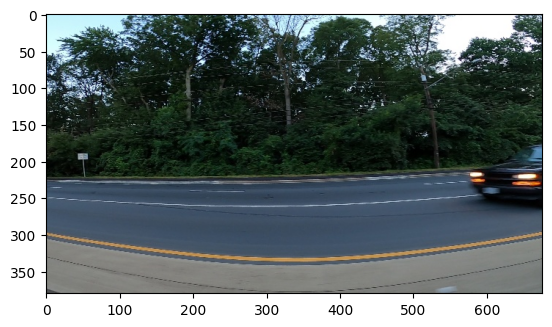

In [5]:
plt.imshow(img_array)


In [6]:
from ultralytics import YOLO
model = YOLO('yolov8s.pt')

results = model.predict(img_array, conf=0.5)

for result in results:
    boxes = result.boxes


0: 384x640 1 car, 12.3ms
Speed: 0.9ms preprocess, 12.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


In [7]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.], device='cuda:0')
conf: tensor([0.8598], device='cuda:0')
data: tensor([[575.8784, 176.5918, 675.6788, 257.2153,   0.8598,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (380, 676)
shape: torch.Size([1, 6])
xywh: tensor([[625.7786, 216.9035,  99.8004,  80.6235]], device='cuda:0')
xywhn: tensor([[0.9257, 0.5708, 0.1476, 0.2122]], device='cuda:0')
xyxy: tensor([[575.8784, 176.5918, 675.6788, 257.2153]], device='cuda:0')
xyxyn: tensor([[0.8519, 0.4647, 0.9995, 0.6769]], device='cuda:0')

In [8]:
class_names = model.names
class_names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

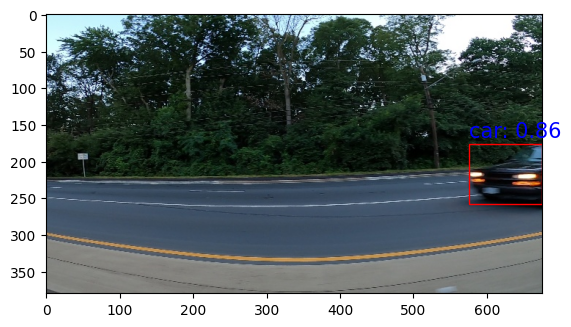

In [9]:
# Create a figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_array)

# Iterate over the boxes and annotations
for box, conf, class_idx in zip(boxes.xyxy.cpu(), boxes.conf.cpu(), boxes.cls.cpu()):
    # Get the class index
    class_index = int(class_idx)

    # Get the class name
    class_name = class_names[class_index]

    # Get the box coordinates
    x1, y1, x2, y2 = box[:4]

    # Create a rectangle patch
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')

    # Add the rectangle patch to the axes
    ax.add_patch(rect)

    # Add the label and confidence score
    label = f"{class_name}: {conf:.2f}"
    ax.text(x1, y1 - 10, label, fontsize=15, color='b')

# Show the plot
plt.show()

In [10]:
train_data = './data/traffic_car/training_images'
train_csv = './data/traffic_car/train_solution_bounding_boxes.csv'
test_data = './data/traffic_car/testing_images'

In [1]:
!mkdir -p "./data_set"

!mkdir -p "./data_set/images"

!mkdir -p "./data_set/images/train"
!mkdir -p "./data_set/images/val"

!mkdir -p "./data_set/labels"

!mkdir -p "./data_set/labels/train"
!mkdir -p "./data_set/labels/val"

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file -p already exists.
Error occurred while processing: -p.


In [11]:
root_dir = 'data_set'
labels_dir = './data_set/labels'
images_dir = './data_set/images'

In [12]:

df = pd.read_csv(train_csv)

width = 676
height = 380

df['class'] = 0
df.rename(columns = {'image':'image_name'}, inplace=True)

df['x_centre'] = (df['xmin']+df['xmax'])/2
df['y_centre'] = (df['ymin']+df['ymax'])/2
df['width'] = (df['xmax'] - df['xmin'])
df['height'] = (df['ymax'] - df['ymin'])

#normalising bounding box coordinates
df['x_centre'] = df['x_centre']/width
df['y_centre'] = df['y_centre']/height
df['width'] = df['width']/width
df['height'] = df['height']/height

df_yolo = df[['image_name', 'class', 'x_centre', 'y_centre', 'width', 'height']]
df_yolo.sample(5)

,image_name,class,x_centre,y_centre,width,height
524,vid_4_9540.jpg,0,0.093591,0.550397,0.143481,0.103627
11,vid_4_10500.jpg,0,0.309334,0.562983,0.175832,0.123552
445,vid_4_6300.jpg,0,0.263025,0.549469,0.129522,0.093951
528,vid_4_9560.jpg,0,0.833576,0.518661,0.182811,0.123057
429,vid_4_6240.jpg,0,0.668596,0.554336,0.173661,0.119128


In [13]:
img_list = list(sorted(os.listdir(train_data)))
np.random.shuffle(img_list)

In [14]:
for i, img_name in enumerate(img_list):
    subset ='train'
    if i >= 80/100 * len(img_list):
        subset = 'val'
    
    if np.isin(img_name, df_yolo['image_name']):
        columns = ['class', 'x_centre', 'y_centre', 'width', 'height']
        img_box = df[df['image_name'] == img_name][columns].values
        label_path = os.path.join(labels_dir, subset, img_name[:-4] + '.txt')
        with open(label_path , 'w+') as f:
            for row in img_box:
                text = " ".join(row.astype(str))
                f.write(text)
                f.write('\n')
                
    old_image_path = os.path.join(train_data, img_name)
    new_image_path = os.path.join(images_dir, subset, img_name)
    shutil.copy(old_image_path, new_image_path)
    
    

In [15]:
a = './data_set/images/train'
b = './data_set/labels/train'


num_files_a = len(os.listdir(a))
num_files_b = len(os.listdir(b))

print(f'number of files of images in train folder: {num_files_a}')
print(f'number of files of labels in trian folder: {num_files_b}')


number of files of images in train folder: 1001
number of files of labels in trian folder: 355


In [16]:
yolo_format = dict(path = './data_set',
                  train='D:/Python/sup/YOLO/data_set/images/train',
                  val ='D:/Python/sup/YOLO/data_set/images/val',
                  nc=1,
                  names={0:'car'})


with open('./data_set/yolo.yaml', 'w') as outfile:
    yaml.dump(yolo_format, outfile, default_flow_style=False)

In [17]:
import torch
print(torch.cuda.is_available())  # Should return True if GPU is available
print(torch.cuda.current_device())  # Check which GPU is being used
print(torch.cuda.get_device_name(0))  # Get the name of the GPU



True
0
NVIDIA GeForce RTX 3050 Laptop GPU


In [18]:

model.train(data='./data_set/yolo.yaml', epochs=10, patience=5, batch=16,
           lr0=0.001, imgsz=640)

Ultralytics YOLOv8.2.76  Python-3.10.14 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=./data_set/yolo.yaml, epochs=10, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=F

train: Scanning D:\Python\sup\YOLO\data_set\labels\train... 355 images, 646 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:01<00:00, 869.78it/s]

train: New cache created: D:\Python\sup\YOLO\data_set\labels\train.cache



val: Scanning D:\Python\sup\YOLO\data_set\labels\val... 190 images, 399 backgrounds, 0 corrupt: 100%|██████████| 589/589 [00:00<00:00, 955.24it/s]

val: New cache created: D:\Python\sup\YOLO\data_set\labels\val.cache


In [ ]:
path_best_weights="D:\Python/sup/YOLO/runs/detect/train8/weights/best.pt"
model = YOLO(path_best_weights) 

metrics = model.val() 

Ultralytics YOLOv8.2.76  Python-3.10.14 torch-1.13.0 CPU (12th Gen Intel Core(TM) i7-12700H)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning D:\Python\sup\YOLO\data_set\labels\val.cache... 154 images, 335 backgrounds, 0 corrupt: 100%|██████████| 489/489 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:51<00:00,  1.65s/it]


                   all        489        245      0.965       0.91      0.981      0.613
Speed: 0.9ms preprocess, 97.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs\detect\val


In [ ]:
print(f'mean average precision @ .50: {metrics.box.map50}')

mean average precision @ .50: 0.9806449288116468


In [ ]:
with torch.no_grad():
    results = model.predict(source = test_data, conf=0.5, iou=0.75)


image 1/175 d:\Python\sup\YOLO\data\traffic_car\testing_images\vid_5_25100.jpg: 384x640 (no detections), 150.6ms
image 2/175 d:\Python\sup\YOLO\data\traffic_car\testing_images\vid_5_25120.jpg: 384x640 (no detections), 145.7ms
image 3/175 d:\Python\sup\YOLO\data\traffic_car\testing_images\vid_5_25140.jpg: 384x640 (no detections), 144.6ms
image 4/175 d:\Python\sup\YOLO\data\traffic_car\testing_images\vid_5_25160.jpg: 384x640 (no detections), 137.9ms
image 5/175 d:\Python\sup\YOLO\data\traffic_car\testing_images\vid_5_25180.jpg: 384x640 (no detections), 130.8ms
image 6/175 d:\Python\sup\YOLO\data\traffic_car\testing_images\vid_5_25200.jpg: 384x640 (no detections), 166.5ms
image 7/175 d:\Python\sup\YOLO\data\traffic_car\testing_images\vid_5_25220.jpg: 384x640 (no detections), 152.4ms
image 8/175 d:\Python\sup\YOLO\data\traffic_car\testing_images\vid_5_25240.jpg: 384x640 (no detections), 141.8ms
image 9/175 d:\Python\sup\YOLO\data\traffic_car\testing_images\vid_5_25260.jpg: 384x640 (no det

In [ ]:
!mkdir -p = './data_set/predictions'
prediction_dir = './data_set/predictions'

The syntax of the command is incorrect.


In [ ]:
test_img_list=[]
for result in results:
    if len(result.boxes.xyxy):
        name=result.path.split("/")[-1].split(".")[0]
        boxes=result.boxes.xyxy.cpu().numpy()
        scores=result.boxes.conf.cpu().numpy()
        
        test_img_list.append(name)
        
        label_file_path=os.path.join(prediction_dir,name+".txt")
        with open(label_file_path,"w+") as f:
            for score,box in zip(scores,boxes):
                text=f"{score:0.4f} "+" ".join(box.astype(str))
                f.write(text)
                f.write("\n")

In [ ]:
def show_bbox(img,boxes,scores,axis,color=(0,255,0)):
    boxes=boxes.astype(int)
    scores=scores
    img=img.copy()
    for i,box in enumerate(boxes):
        score=f"{scores[i]:.4f}"
        cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),color,2)
        y=box[1]-10 if box[1]-10>10 else box[1]+10
        cv2.putText(img,score,(box[0],y),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
    
    axis.imshow(img)
    axis.axis("off")

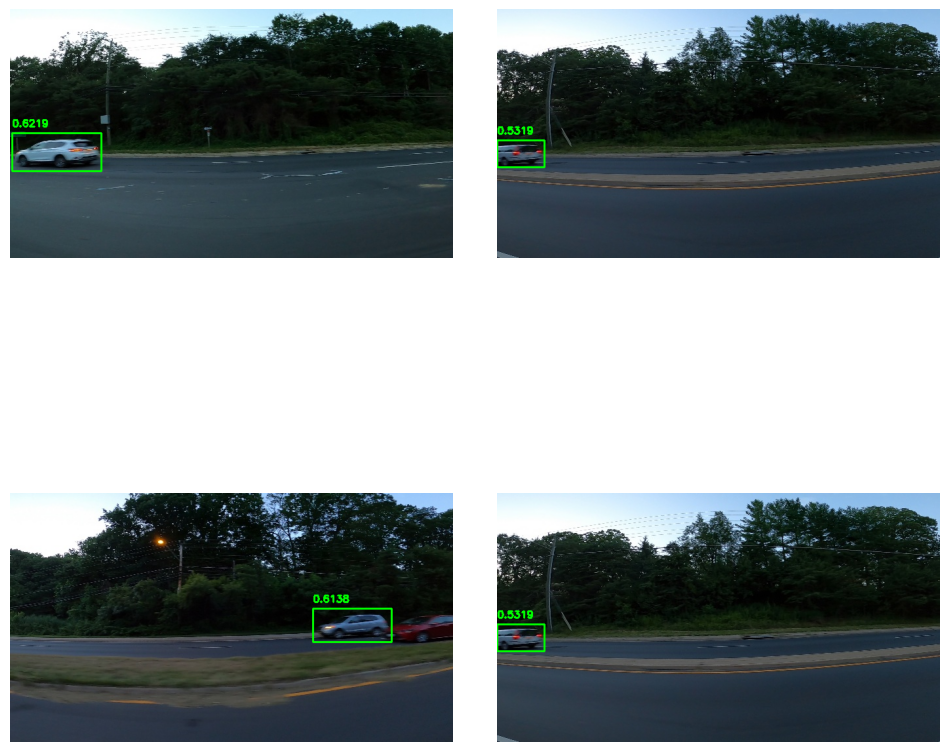

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(12,12))
plt.subplots_adjust(wspace=0.1,hspace=0.1)
ax=axes.flatten()

imgs_name=np.random.choice(test_img_list,4)

for i,img_name in enumerate(imgs_name):
    img_file_path=os.path.join(test_data,img_name+".jpg")
    img=cv2.imread(img_file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    label_file_path=os.path.join(prediction_dir,img_name+".txt")
    label=pd.read_csv(label_file_path,sep=" ",header=None).values
    scores=label[:,0]
    boxes=label[:,1:]
    show_bbox(img,boxes,scores,axis=ax[i])
    
plt.savefig("car.png")